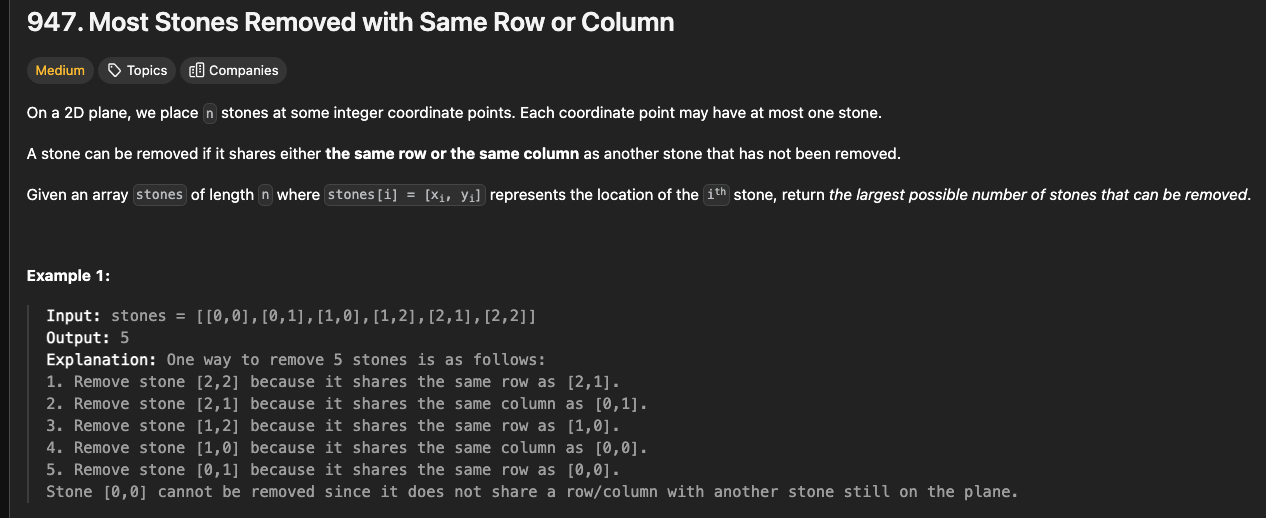

https://leetcode.com/problems/most-stones-removed-with-same-row-or-column/description/

for every connected component, we can remove all the stones except one.    
Now, after removing all the stones, we will be left with only one stone per connected component, 
this will not form another component for sure

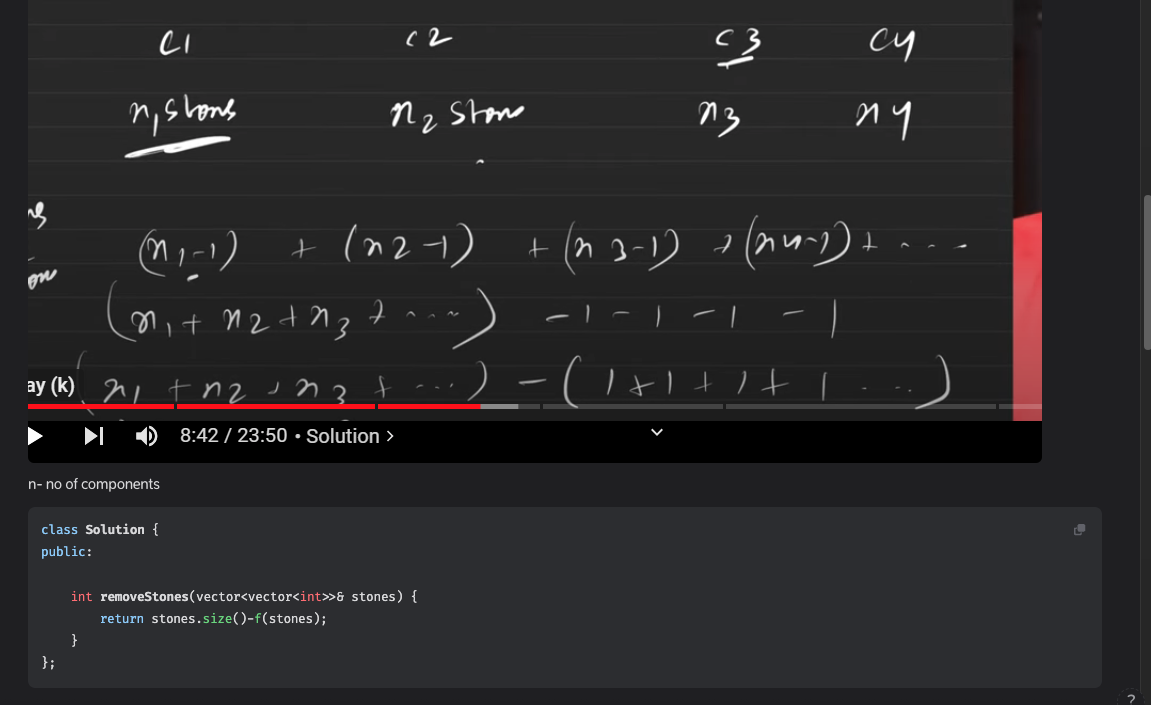

where function f calculates, the number of components in a matrix, but this component is not same as island wala component, for a component the definition is the 1s lying in same row or column

https://www.youtube.com/watch?v=OwMNX8SPavM     
https://www.youtube.com/watch?v=beOCN7G4h-M    


In [ ]:
//Brute Force
class dsu{
public:
    int cnt;  
    vector<int> par,size;
    dsu(int n){
        cnt=n;
        for(int i=0;i<n;i++){
            par.push_back(i);
            size.push_back(1);
        }
    }

    int find(int node){
        if(par[node]==node){
            return node;
        } 
        return par[node]=find(par[node]);
    }

    bool sameRoot(int i, int j){
        return find(i)==find(j);
    }

    void union_(int i, int j){
        if(sameRoot(i,j)){
            return;
        } 
        cnt--;
        int rooti=find(i),rootj=find(j);
        int sizei=size[rooti],sizej=size[rootj];
        if(size[rooti]<size[rootj]) swap(rooti,rootj);
        par[rootj]=rooti;
        size[rooti]+=size[rootj];
    }

};

int f(vector<vector<int>>& ma){
    int n=ma.size();
    dsu d(n);
    for(int i=0;i<n;i++){
        for(int j=i+1;j<n;j++){
            if(ma[i][0]==ma[j][0] or ma[i][1]==ma[j][1]){
                d.union_(i,j);
            } 
        }
    }
    return d.cnt;
}
//TC O(n^2)logn


In [ ]:

//optimised
class dsu{
    public: 
        unordered_map<int,int> par;
        int count;

        dsu(vector<vector<int>>& stones){
            int noOfStones=stones.size();
            for(int i=0;i<noOfStones;i++){
                int r=stones[i][0],c=stones[i][1]; 
                par[r+1]=r+1;
                par[-(c+1)]=-(c+1);
            }
            count=par.size();
        }
        
        int find(int i){
          return par[i] == i ? i : (par[i] = find(par[i]));
        }
        
        void union_(int i, int j){
            par[find(i)]=find(j);
            count--;
        }
    };
    
    int f(vector<vector<int>>& stones){
        int noOfStones=stones.size();
        dsu d(stones);
        for(int i=0;i<noOfStones;i++){
            d.union_((stones[i][0]+1),-(stones[i][1]+1));
        } 
        return d.count;
    }
    
    int removeStones(vector<vector<int>>& stones) {
        return stones.size()-f(stones);
    }

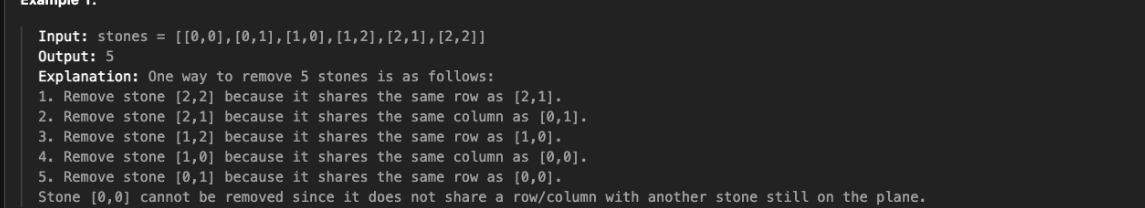

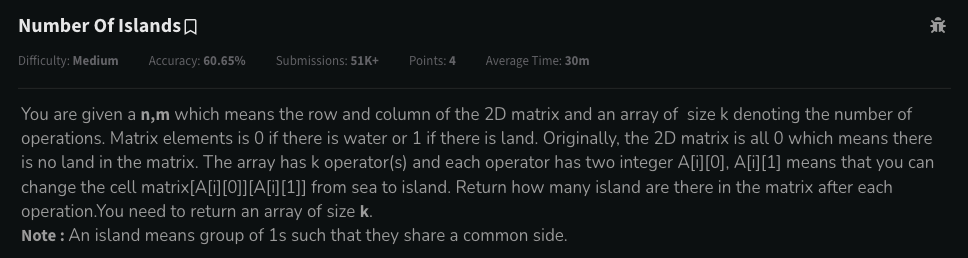

https://www.geeksforgeeks.org/problems/number-of-islands/1

sol. brute forcce, do a bfs after every query

In [ ]:
#define ll int
class Solution {  
public:
    class dsu{
    public: 
          vector<int> par,size;
          int components;
          dsu(int n){
              for(int i=0;i<n;i++){
                  par.push_back(i);
                  size.push_back(1);
              }
            components=par.size();
          }
        
        int find(int node){
            if(par[node]==node){
                return node;
            } 
            return par[node]=find(par[node]);
        }
    
        void union_(int i, int j){
            if(find(i)==find(j)){
                return;
            } 
            int rooti=find(i),rootj=find(j);
            int sizei=size[rooti],sizej=size[rootj];
            if(size[rooti]<size[rootj]) swap(rooti,rootj);
            par[rootj]=rooti;
            size[rooti]+=size[rootj];
            components--;
        }
    };
    
    bool isValid(ll r, ll c , ll rr, ll cc){
    	return r>=0 and r<rr and c>=0 and c<cc;	
    }

    vector<int> numOfIslands(int rr, int cc, vector<vector<int>> &queries) {
        dsu d(rr*cc);
        vector<vector<bool>> vis(rr,vector<bool>(cc,0));
        int cnt=0;
        vector<int> ans;
        vector<vector<int>> directions={{1,0},{-1,0},{0,1},{0,-1}};
        for(auto q: queries){
            int r=q[0],c=q[1];
            if(vis[r][c]){
                ans.push_back(cnt);
                continue;
            }
            vis[r][c]=1;
            cnt++;
            for(auto dir:directions){
                int tr=r+dir[0],tc=c+dir[1];
                if(!isValid(tr,tc,rr,cc) or !vis[tr][tc]){
                    continue;
                } 
                int node =r*cc+c,adNode=tr*cc+tc;
                if(d.find(node)!=d.find(adNode)){
                    cnt--;
                    d.union_(node,adNode);
                }
            }
            ans.push_back(cnt);            
        }
        return ans;
    }
};

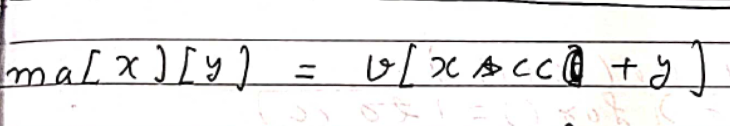

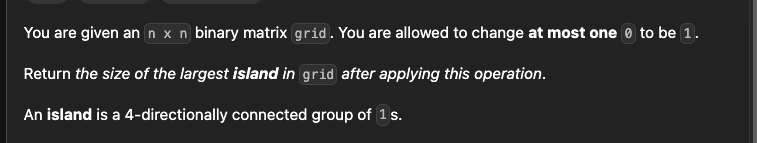

https://leetcode.com/problems/making-a-large-island/description/    
https://www.youtube.com/watch?v=lgiz0Oup6gM

Edge case when all matrix is 1

In [ ]:
#define ll int
class Solution {
public:
    class dsu{
    public: 
        vector<int> par,size;
        int components;
        dsu(int n){
            for(int i=0;i<n;i++){
                par.push_back(i);
                size.push_back(1);
            }
            components=par.size();
        }
        
        int find(int node){
            if(par[node]==node){
                return node;
            } 
            return par[node]=find(par[node]);
        }

        void union_(int i, int j){
            if(find(i)==find(j)) return;
            int rooti=find(i),rootj=find(j);
            int sizei=size[rooti],sizej=size[rootj];
            if(size[rooti]<size[rootj]){
                swap(rooti,rootj);
            } 
            par[rootj]=rooti;
            size[rooti]+=size[rootj];
            components--;
        }
    };

    bool isValid(ll r, ll c , ll rr, ll cc){
        return r>=0 and r<rr and c>=0 and c<cc;	
    }

    int largestIsland(vector<vector<int>>& ma) {
        int rr=ma.size();
        dsu d(rr*rr);
        int cnt=0;
        vector<vector<int>> directions={{1,0},{-1,0},{0,1},{0,-1}};  
        for(int r=0;r<rr;r++){
            for(int c=0;c<rr;c++){
                if(ma[r][c]==0){
                    continue;
                }
                cnt++;//detected a 1
                for(auto dir: directions){
                    int tr=r+dir[0],tc=c+dir[1];
                    if(!isValid(tr,tc,rr,rr) or !ma[tr][tc]){
                        continue;
                    } 
                    int node=r*rr+c;
                    int adNode=tr*rr+tc;
                    if(d.find(node)==d.find(adNode)){
                        continue;
                    } 
                    d.union_(node,adNode); 
                }
            }
        }
        
        //the dsu is ready with all the 1s connected

        if(cnt==rr*rr){
            return rr*rr;  
            // all 1s
        } 
        
        int maxx=0;
        for(int r=0;r<rr;r++){
            for(int c=0;c<rr;c++){
                if(ma[r][c]==1){
                    continue;
                } 
                //we are in a empty space
                unordered_set<int> se;
                for(auto dir: directions){
                    int tr=r+dir[0],tc=c+dir[1];
                    if(!isValid(tr,tc,rr,rr) or !ma[tr][tc]){
                        continue;
                    } 
                    int node=r*rr+c;
                    int adNode=tr*rr+tc;
                    se.insert(d.find(adNode));
                }
                int sizeTotal=1;
                for(auto x: se){
                    sizeTotal+=d.size[x];
                }
                maxx=max(maxx,sizeTotal);                
            }
        } 
        return maxx;
    }
};